### **SkinClassification with learn transfer**

In [1]:
#pi(m)p up environment
!pip install fastai --upgrade -q
!pip install pydicom
!pip install kornia
!pip install fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 12.3 MB/s eta 0:00:00a 0:00:01


In [2]:
#import all needed ones
from fastai.vision.all import *
from fastai.text.all import *
from fastai.collab import *
from fastai.tabular.all import *
from fastai.medical.imaging import *
from fastbook import *
from fastai.vision.widgets import ImageClassifierCleaner

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Check version nr
import fastai; print(fastai.__version__)
import fastcore; print(fastcore.__version__)

2.7.11
1.5.28


### **Load TrainData including Cancer and Non_cancer pictures**

In [4]:
#define path to data
path = Path('/kaggle/input/train-data/train_data')

In [5]:
#check corrupt pictures
fns = get_image_files(path)
failed = verify_images(fns)

failed #0 since there are from kaggle

(#0) []

### **Start the data preparation**

In [27]:
#create a datablock and prepare dataloaders incuding Resize(224 - model requirement) and Augmentation
skin = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224),
    batch_tfms=aug_transforms()
)

dls = skin.dataloaders(path)

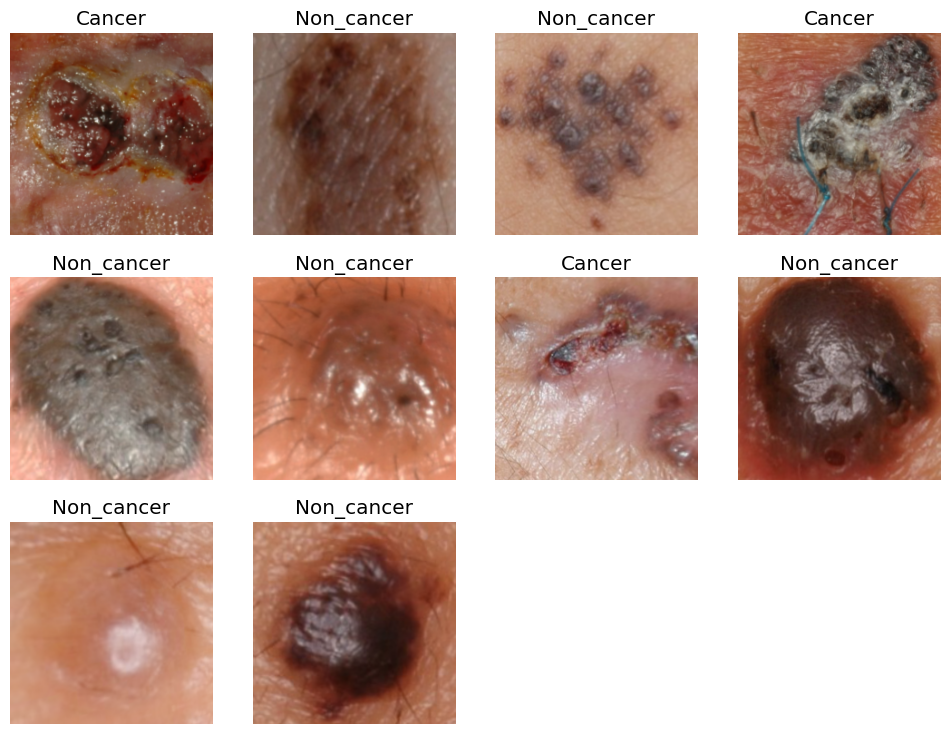

In [28]:
#see 10 examples out of the dataset
dls.show_batch(max_n=10)

### learn_skin_1 (resnet18-based model)

In [29]:
#lerner_1 (reset18)
learn_skin_1 = vision_learner(dls, resnet18, metrics=error_rate, pretrained=True)
learn_skin_1.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.167617,0.465016,0.218182,00:39


epoch,train_loss,valid_loss,error_rate,time
0,0.872339,0.391947,0.181818,00:54
1,0.774354,0.438159,0.200000,00:53
2,0.674454,0.410756,0.218182,00:53


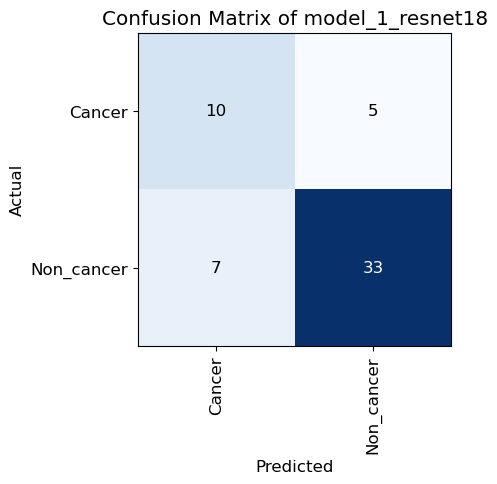

In [30]:
interp_1 = ClassificationInterpretation.from_learner(learn_skin_1)
interp_1.plot_confusion_matrix()
plt.title("Confusion Matrix of model_1_resnet18")
plt.show()

### learn_skin_2 (resnet50-based model)

In [31]:
#learner_2
learn_skin_2 = vision_learner(dls, resnet50, metrics=error_rate)
learn_skin_2.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.353459,2.035918,0.727273,01:45


epoch,train_loss,valid_loss,error_rate,time
0,0.854634,2.043697,0.618182,02:19
1,0.742125,1.223877,0.418182,02:20
2,0.638247,0.765777,0.309091,02:16


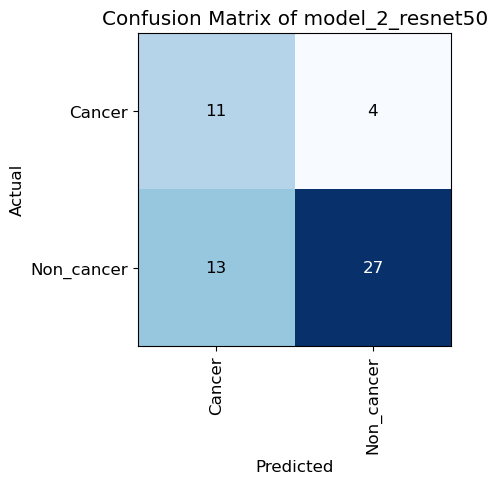

In [32]:
interp_2 = ClassificationInterpretation.from_learner(learn_skin_2)
interp_2.plot_confusion_matrix()
plt.title("Confusion Matrix of model_2_resnet50")
plt.show()

### learn_skin_3 (resnet152-based model)

In [33]:
#learner_3
learn_skin_3= vision_learner(dls, resnet152, metrics=error_rate)
learn_skin_3.fine_tune(3)

/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth


  0%|          | 0.00/230M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.123659,0.540725,0.272727,04:07


epoch,train_loss,valid_loss,error_rate,time
0,0.683500,0.424149,0.200000,05:12
1,0.598321,0.521325,0.163636,05:07
2,0.497688,0.519306,0.163636,05:06


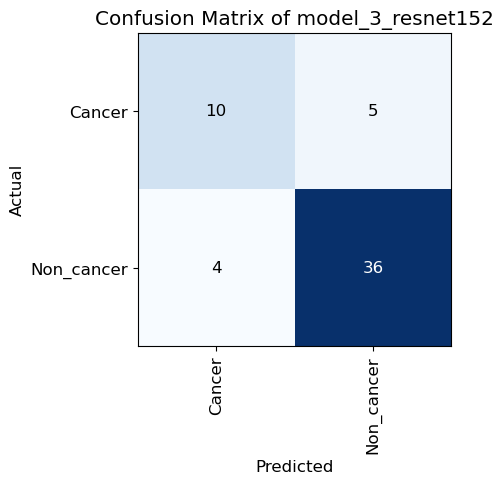

In [34]:
interp_3 = ClassificationInterpretation.from_learner(learn_skin_3)
interp_3.plot_confusion_matrix()
plt.title("Confusion Matrix of model_3_resnet152")
plt.show()

### learn_skin_4 (vgg16-based model)

In [36]:
learn_skin_4 = vision_learner(dls, vgg16, metrics=error_rate)
learn_skin_4.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.202268,1.009437,0.472727,02:04


epoch,train_loss,valid_loss,error_rate,time
0,0.988864,0.944052,0.454545,05:34
1,0.796150,0.808021,0.381818,05:34
2,0.775100,0.770380,0.327273,05:36


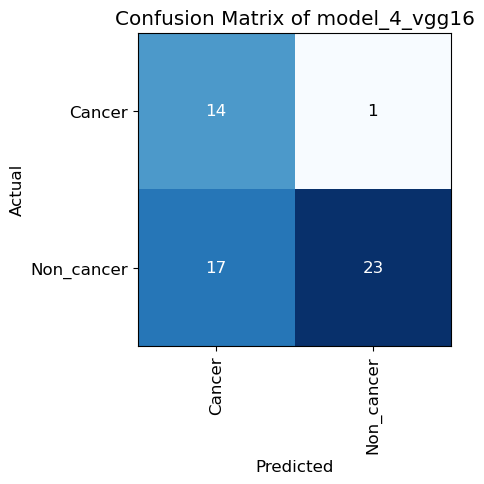

In [37]:
interp_4 = ClassificationInterpretation.from_learner(learn_skin_4)
interp_4.plot_confusion_matrix()
plt.title("Confusion Matrix of model_4_vgg16")
plt.show()

### prediction with all 4 models
### 5 cancer and 5 non-caner pictures were isolated before the training(these 10 pictures are not present in training/test data)
### If the name consist of "c" - it means cancer, meanwhile "cn" in the name represents the non-cancer. It is important to know for the prediction.


In [40]:
#assign picures for prediction
filenames = ['/kaggle/input/test-for-prediction/1_c.JPG',
             '/kaggle/input/test-for-prediction/1_nc.JPG',
            '/kaggle/input/test-for-prediction/2_c.JPG',
             '/kaggle/input/test-for-prediction/2_nc.JPG',
             '/kaggle/input/test-for-prediction/3_c.JPG',
             '/kaggle/input/test-for-prediction/3_nc.JPG',
             '/kaggle/input/test-for-prediction/4_c.JPG',
             '/kaggle/input/test-for-prediction/4_nc.JPG',
             '/kaggle/input/test-for-prediction/5_c.JPG',
             '/kaggle/input/test-for-prediction/5_nc.JPG']


In [48]:
# define function to predict skin and return a dictionary using model_1
def predict_skin_dict(learn, filename):
    img = PILImage.create(filename)
    img_tensor = tensor(img)
    pred = learn_skin_1.predict(img_tensor)
    return {'filename': filename, 'prediction_1_resnet18': pred[0]}

# collect predictions into a list of dictionaries
predictions_1 = [predict_skin_dict(learn_skin_1, filename) for filename in filenames]

# convert list of dictionaries into a dataframe
df_1 = pd.DataFrame(predictions_1)
df_1

,filename,prediction_1_resnet18
0,/kaggle/input/test-for-prediction/1_c.JPG,Cancer
1,/kaggle/input/test-for-prediction/1_nc.JPG,Non_cancer
2,/kaggle/input/test-for-prediction/2_c.JPG,Cancer
3,/kaggle/input/test-for-prediction/2_nc.JPG,Non_cancer
4,/kaggle/input/test-for-prediction/3_c.JPG,Cancer
5,/kaggle/input/test-for-prediction/3_nc.JPG,Non_cancer
6,/kaggle/input/test-for-prediction/4_c.JPG,Cancer
7,/kaggle/input/test-for-prediction/4_nc.JPG,Non_cancer
8,/kaggle/input/test-for-prediction/5_c.JPG,Non_cancer
9,/kaggle/input/test-for-prediction/5_nc.JPG,Non_cancer


In [49]:
# define function to predict skin and return a dictionary using model_2
def predict_skin_dict(learn, filename):
    img = PILImage.create(filename)
    img_tensor = tensor(img)
    pred = learn_skin_2.predict(img_tensor)
    return {'filename': filename, 'prediction_2_resnet50': pred[0]}

# collect predictions into a list of dictionaries
predictions_2 = [predict_skin_dict(learn_skin_2, filename) for filename in filenames]

# convert list of dictionaries into a dataframe
df_2 = pd.DataFrame(predictions_2)
df_2

,filename,prediction_2_resnet50
0,/kaggle/input/test-for-prediction/1_c.JPG,Cancer
1,/kaggle/input/test-for-prediction/1_nc.JPG,Non_cancer
2,/kaggle/input/test-for-prediction/2_c.JPG,Cancer
3,/kaggle/input/test-for-prediction/2_nc.JPG,Non_cancer
4,/kaggle/input/test-for-prediction/3_c.JPG,Cancer
5,/kaggle/input/test-for-prediction/3_nc.JPG,Non_cancer
6,/kaggle/input/test-for-prediction/4_c.JPG,Cancer
7,/kaggle/input/test-for-prediction/4_nc.JPG,Cancer
8,/kaggle/input/test-for-prediction/5_c.JPG,Cancer
9,/kaggle/input/test-for-prediction/5_nc.JPG,Cancer


In [50]:
# define function to predict skin and return a dictionary using model_3
def predict_skin_dict(learn, filename):
    img = PILImage.create(filename)
    img_tensor = tensor(img)
    pred = learn_skin_3.predict(img_tensor)
    return {'filename': filename, 'prediction_3_resnet152': pred[0]}

# collect predictions into a list of dictionaries
predictions_3 = [predict_skin_dict(learn_skin_3, filename) for filename in filenames]

# convert list of dictionaries into a dataframe
df_3 = pd.DataFrame(predictions_3)
df_3

,filename,prediction_3_resnet152
0,/kaggle/input/test-for-prediction/1_c.JPG,Cancer
1,/kaggle/input/test-for-prediction/1_nc.JPG,Non_cancer
2,/kaggle/input/test-for-prediction/2_c.JPG,Cancer
3,/kaggle/input/test-for-prediction/2_nc.JPG,Non_cancer
4,/kaggle/input/test-for-prediction/3_c.JPG,Cancer
5,/kaggle/input/test-for-prediction/3_nc.JPG,Non_cancer
6,/kaggle/input/test-for-prediction/4_c.JPG,Cancer
7,/kaggle/input/test-for-prediction/4_nc.JPG,Non_cancer
8,/kaggle/input/test-for-prediction/5_c.JPG,Cancer
9,/kaggle/input/test-for-prediction/5_nc.JPG,Cancer


In [51]:
# define function to predict skin and return a dictionary using model_4
def predict_skin_dict(learn, filename):
    img = PILImage.create(filename)
    img_tensor = tensor(img)
    pred = learn_skin_3.predict(img_tensor)
    return {'filename': filename, 'prediction_4_vgg16': pred[0]}

# collect predictions into a list of dictionaries
predictions_4 = [predict_skin_dict(learn_skin_4, filename) for filename in filenames]

# convert list of dictionaries into a dataframe
df_4 = pd.DataFrame(predictions_4)
df_4

,filename,prediction_4_vgg16
0,/kaggle/input/test-for-prediction/1_c.JPG,Cancer
1,/kaggle/input/test-for-prediction/1_nc.JPG,Non_cancer
2,/kaggle/input/test-for-prediction/2_c.JPG,Cancer
3,/kaggle/input/test-for-prediction/2_nc.JPG,Non_cancer
4,/kaggle/input/test-for-prediction/3_c.JPG,Cancer
5,/kaggle/input/test-for-prediction/3_nc.JPG,Non_cancer
6,/kaggle/input/test-for-prediction/4_c.JPG,Cancer
7,/kaggle/input/test-for-prediction/4_nc.JPG,Non_cancer
8,/kaggle/input/test-for-prediction/5_c.JPG,Cancer
9,/kaggle/input/test-for-prediction/5_nc.JPG,Cancer


In [55]:
#merge all datasets to compare with original picture status
original = {
    'filename': ['/kaggle/input/test-for-prediction/1_c.JPG',
             '/kaggle/input/test-for-prediction/1_nc.JPG',
            '/kaggle/input/test-for-prediction/2_c.JPG',
             '/kaggle/input/test-for-prediction/2_nc.JPG',
             '/kaggle/input/test-for-prediction/3_c.JPG',
             '/kaggle/input/test-for-prediction/3_nc.JPG',
             '/kaggle/input/test-for-prediction/4_c.JPG',
             '/kaggle/input/test-for-prediction/4_nc.JPG',
             '/kaggle/input/test-for-prediction/5_c.JPG',
             '/kaggle/input/test-for-prediction/5_nc.JPG'],
    'original_status':['Cancer', 'Non_Cancer', 'Cancer', 'Non_Cancer', 'Cancer', 'Non_Cancer', 'Cancer', 'Non_Cancer', 'Cancer', 'Non_Cancer']
}
df_original =pd.DataFrame(original)

df_all = pd.merge(df_original, df_1, on='filename', how='left')
df_all = df_all.merge(df_2, on='filename', how='left')
df_all = df_all.merge(df_3, on='filename', how='left')
df_all = df_all.merge(df_4, on='filename', how='left')

In [56]:
#final table with results
df_all

,filename,original_status,prediction_1_resnet18,prediction_2_resnet50,prediction_3_resnet152,prediction_4_vgg16
0,/kaggle/input/test-for-prediction/1_c.JPG,Cancer,Cancer,Cancer,Cancer,Cancer
1,/kaggle/input/test-for-prediction/1_nc.JPG,Non_Cancer,Non_cancer,Non_cancer,Non_cancer,Non_cancer
2,/kaggle/input/test-for-prediction/2_c.JPG,Cancer,Cancer,Cancer,Cancer,Cancer
3,/kaggle/input/test-for-prediction/2_nc.JPG,Non_Cancer,Non_cancer,Non_cancer,Non_cancer,Non_cancer
4,/kaggle/input/test-for-prediction/3_c.JPG,Cancer,Cancer,Cancer,Cancer,Cancer
5,/kaggle/input/test-for-prediction/3_nc.JPG,Non_Cancer,Non_cancer,Non_cancer,Non_cancer,Non_cancer
6,/kaggle/input/test-for-prediction/4_c.JPG,Cancer,Cancer,Cancer,Cancer,Cancer
7,/kaggle/input/test-for-prediction/4_nc.JPG,Non_Cancer,Non_cancer,Cancer,Non_cancer,Non_cancer
8,/kaggle/input/test-for-prediction/5_c.JPG,Cancer,Non_cancer,Cancer,Cancer,Cancer
9,/kaggle/input/test-for-prediction/5_nc.JPG,Non_Cancer,Non_cancer,Cancer,Cancer,Cancer


### ***overall results***
| model_name   | accuracy  | avr time of epoch|   
|--------------|-----------|------------------|
| model_1      | **90**%   |        ~1min     |
| model_2      | 80%      |   ~2min  |
| model_3      | **90%**  |  ~5min  |
| model_4      | **90%**  |  ~5min|



 